## LinkedIn Data Analysis Challenge


### Tasks

- Straighten out the dataframe to a table of at least 7 columns.
- Identify the top 5 predominant ages in the dataset.
- Determine the bank with the largest share of transactions.
- Show a distribution of channels used on transactions.

In [11]:
#load the libaries
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(treemapify)
library(plotrix)

In [12]:
#import data
data <- read_excel('Killa.xlsx')

In [13]:
#to view the first five rows
head(data)

First Name,Last Name,transaction
nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T05:28:47.543000Z', 'tx_amount': 6192, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'QBank', 'dob': ['1992-11-10 00:00:00']}"
angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-12T20:22:38.986000Z', 'tx_amount': 38445, 'tx_mode': 'Debit', 'tx_channel': 'mobile', 'bank_name': 'ABank', 'dob': ['n/a']}"
dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T06:00:46.904000Z', 'tx_amount': 29627, 'tx_mode': 'Debit', 'tx_channel': 'mobile', 'bank_name': 'GBank', 'dob': ['1992-01-01 00:00:00']}"
ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T16:10:51.479000Z', 'tx_amount': 27791, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'KBank', 'dob': ['1981-01-07 00:00:00']}"
nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T05:28:47.543000Z', 'tx_amount': 6192, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'QBank', 'dob': ['n/a']}"
juagn,ahcnaiz,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-12T20:22:38.986000Z', 'tx_amount': 38445, 'tx_mode': 'Debit', 'tx_channel': 'mobile', 'bank_name': 'ABank', 'dob': ['1980-11-22 00:00:00']}"










## Data Wrangling

In [14]:
data$transaction <- gsub("\\{|\\}", '', data$transaction) #to remove the curly braces
data$transaction <- gsub("\\[|\\]", '', data$transaction) #to remove square brackets
data$transaction <- gsub("'", '', data$transaction) #to remove the parentheses
head(data)

First Name,Last Name,transaction
nooeukw,uuoaklowalb,"tx_id: 5ed3d67b8723c11444c43283, tx_date: 2020-06-13T05:28:47.543000Z, tx_amount: 6192, tx_mode: Debit, tx_channel: web, bank_name: QBank, dob: 1992-11-10 00:00:00"
angulbo,seagn,"tx_id: 5ed3d67b8723c11444c43283, tx_date: 2020-06-12T20:22:38.986000Z, tx_amount: 38445, tx_mode: Debit, tx_channel: mobile, bank_name: ABank, dob: n/a"
dukowi,eukloomja,"tx_id: 5ed3d67b8723c11444c43283, tx_date: 2020-06-13T06:00:46.904000Z, tx_amount: 29627, tx_mode: Debit, tx_channel: mobile, bank_name: GBank, dob: 1992-01-01 00:00:00"
ltuoawiob,uuilawobmn,"tx_id: 5ed3d67b8723c11444c43283, tx_date: 2020-06-13T16:10:51.479000Z, tx_amount: 27791, tx_mode: Debit, tx_channel: web, bank_name: KBank, dob: 1981-01-07 00:00:00"
nakuolo,donald,"tx_id: 5ed3d67b8723c11444c43283, tx_date: 2020-06-13T05:28:47.543000Z, tx_amount: 6192, tx_mode: Debit, tx_channel: web, bank_name: QBank, dob: n/a"
juagn,ahcnaiz,"tx_id: 5ed3d67b8723c11444c43283, tx_date: 2020-06-12T20:22:38.986000Z, tx_amount: 38445, tx_mode: Debit, tx_channel: mobile, bank_name: ABank, dob: 1980-11-22 00:00:00"


In [15]:
#to separate transaction column into multiple columns
data <- data %>% separate(transaction, c("tx_id", "tx_date", "tx_amount", "tx_mode", "tx_channel", "bank_name", "dob"), 
                          sep = "([,])")
head(data)

First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
nooeukw,uuoaklowalb,tx_id: 5ed3d67b8723c11444c43283,tx_date: 2020-06-13T05:28:47.543000Z,tx_amount: 6192,tx_mode: Debit,tx_channel: web,bank_name: QBank,dob: 1992-11-10 00:00:00
angulbo,seagn,tx_id: 5ed3d67b8723c11444c43283,tx_date: 2020-06-12T20:22:38.986000Z,tx_amount: 38445,tx_mode: Debit,tx_channel: mobile,bank_name: ABank,dob: n/a
dukowi,eukloomja,tx_id: 5ed3d67b8723c11444c43283,tx_date: 2020-06-13T06:00:46.904000Z,tx_amount: 29627,tx_mode: Debit,tx_channel: mobile,bank_name: GBank,dob: 1992-01-01 00:00:00
ltuoawiob,uuilawobmn,tx_id: 5ed3d67b8723c11444c43283,tx_date: 2020-06-13T16:10:51.479000Z,tx_amount: 27791,tx_mode: Debit,tx_channel: web,bank_name: KBank,dob: 1981-01-07 00:00:00
nakuolo,donald,tx_id: 5ed3d67b8723c11444c43283,tx_date: 2020-06-13T05:28:47.543000Z,tx_amount: 6192,tx_mode: Debit,tx_channel: web,bank_name: QBank,dob: n/a
juagn,ahcnaiz,tx_id: 5ed3d67b8723c11444c43283,tx_date: 2020-06-12T20:22:38.986000Z,tx_amount: 38445,tx_mode: Debit,tx_channel: mobile,bank_name: ABank,dob: 1980-11-22 00:00:00


In [16]:
#to separate and extract the data needed for analysis. NA was imputed to ignore the first variable
data <- data %>% separate(tx_id, c(NA, "ID"), sep = "([:])", extra = "drop")
data <- data %>% separate(tx_date, c(NA, "Date"), sep = "([:])", extra = "drop")
data <- data %>% separate(tx_amount, c(NA, "Amount"), sep = "([:])", extra = "drop")
data <- data %>% separate(tx_mode, c(NA, "ModeOfPayment"), sep = "([:])", extra = "drop")
data <- data %>% separate(tx_channel, c(NA, "Channel"), sep = "([:])", extra = "drop")
data <- data %>% separate(bank_name, c(NA, "BankName"), sep = "([:])", extra = "drop")
data <- data %>% separate(dob, c(NA, "YearOfBirth"), sep = "([:-])", extra = "drop")
head(data)

First Name,Last Name,ID,Date,Amount,ModeOfPayment,Channel,BankName,YearOfBirth
nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05,6192,Debit,web,QBank,1992
angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20,38445,Debit,mobile,ABank,n/a
dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06,29627,Debit,mobile,GBank,1992
ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16,27791,Debit,web,KBank,1981
nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05,6192,Debit,web,QBank,n/a
juagn,ahcnaiz,5ed3d67b8723c11444c43283,2020-06-12T20,38445,Debit,mobile,ABank,1980


In [17]:
data <- transform(data, YearOfBirth = as.numeric(YearOfBirth))
data$Age <- 2020 - data$YearOfBirth #to extract the age

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

## To identify the top 5 predominant ages in the dataset

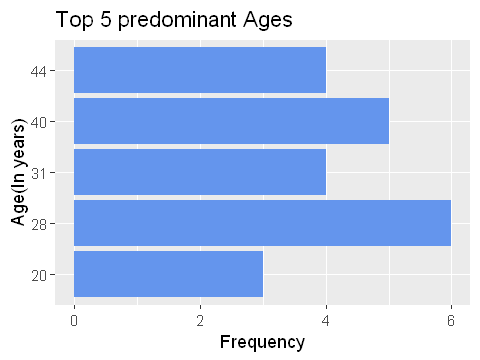

In [18]:
options(repr.plot.width=4, repr.plot.height=3) #to set the size of the chart
data <- transform(data, Age = as.factor(Age)) #to change the age to categorical variable
agedata <- data %>% count(Age)
agedata <- agedata %>% arrange(desc(n)) %>% slice(2:6) #I started from 2 because the highest frequency is the NA value

ggplot(agedata, aes(x = Age, y=n)) + geom_bar(fill = "cornflowerblue", stat="identity") + labs(x = "Age(In years)", 
                                                    y = "Frequency", title = "Top 5 predominant Ages") + coord_flip()

## To determine the bank with the largest share of transactions.

`summarise()` ungrouping output (override with `.groups` argument)


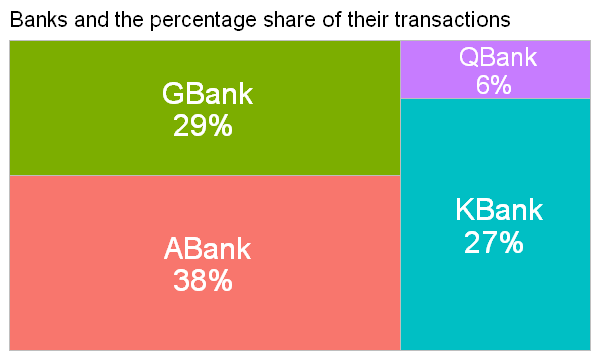

In [19]:
options(repr.plot.width=5, repr.plot.height=3)
data <- transform(data, Amount = as.numeric(Amount))
bankdata <- data %>% group_by(BankName) %>% summarise(Amount = sum(Amount))
bankdata$PercAmt <- round(bankdata$Amount*100/sum(bankdata$Amount))
bankdata$label <- paste0(bankdata$BankName, "\n", round(bankdata$PercAmt), "%")

ggplot(bankdata, aes(fill = BankName, area = Amount, label = label)) + geom_treemap() + geom_treemap_text(colour = "white", 
    place = "centre") + labs(title = "Banks and the percentage share of their transactions") + theme(legend.position = "none")

### ABank has the largest share of transactions

## To show distribution of channels used on transactions

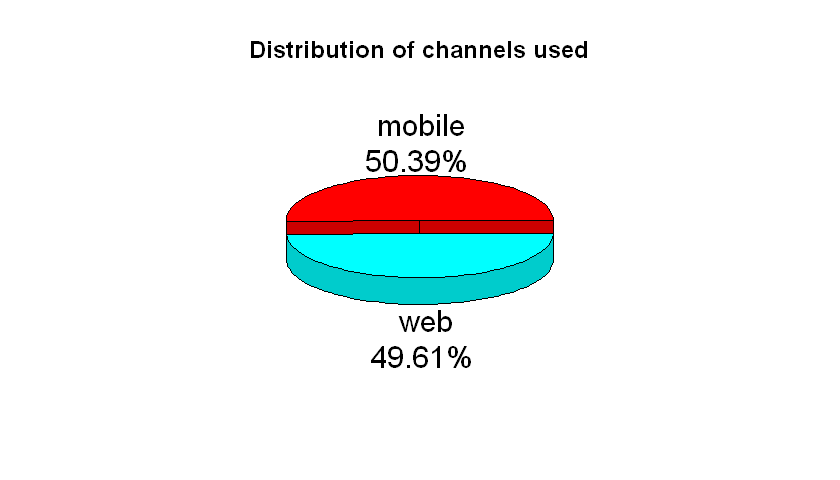

In [20]:
options(repr.plot.width=7, repr.plot.height=4)
channeldata <- data %>% count(Channel)
channeldata$PercAmt <- round(channeldata$n*100/sum(channeldata$n), 2)
channeldata$label <- paste0(channeldata$Channel, "\n", channeldata$PercAmt, "%")

pie3D(channeldata$PercAmt,labels=channeldata$label, explode=0.1, main="Distribution of channels used")